# Advanced Data Science and Machine Learning. Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

# Artificial Neural Networks with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

#### TensorFlow is an open source library for high performance numerical computation including machine learning and deep learning and many other scientific applications. It is originally developed by researchers and engineers in the Google Brain team within Google’s AI. Ref: https://www.tensorflow.org

#### Keras is a powerful, user-friendly, and open-source neural network framework/API written in Python. Keras is capable of running on top of TensorFlow or Theano libraries. Ref: https://keras.io

In [1]:
# "Sequential" models let us define a stack of neural network layers
from keras.models import Sequential

# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np

In [2]:
# import some utilities to transform/preprocess our data:

from keras.utils import np_utils

#### Let's start with a well-known hand-written digit dataset named MNIST. It is a simple but big dataset (70,000 samples of 28x28 pixels) (wikipedia.org/wiki/MNIST_database). 

In [3]:
# Keras will download MNIST digit dataset for us:
from keras.datasets import mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


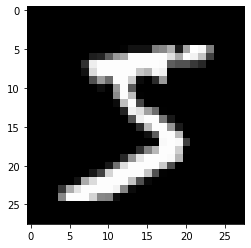

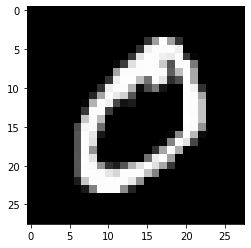

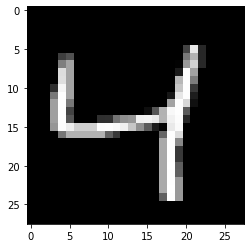

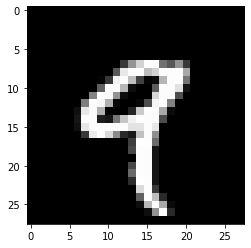

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[0,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[2,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[4,:,:],cmap=plt.cm.gray)
plt.show()

In [6]:
# Reshape each image pixels into a row of feature table with 28*28=784 features (each pixel is a feature):

X_train = X_train.reshape(X_train.shape[0], 784)

X_test = X_test.reshape(X_test.shape[0], 784)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# print(X_train[0,:])

In [9]:
# simply scale the features to the range of [0,1]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# print(X_train[0,:])

In [11]:
# output label:

print (y_train.shape)
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [12]:
# OneHotEncoding for the output label:

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [13]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10,:])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [14]:
# Declare Sequential model to build our network:
model = Sequential()

In [15]:
input_size = 784
hidden_neurons = 100
out_size = 10

In [16]:
## Designing the ANN Structure (with 784 inputs, 10 outputs and 100 neuron in a hidden layer):

# -----------------------------------------
# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: output layer:
model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
model.add(Activation('softmax')) # Activation


## Compile the model:
#### We need to compile the model to establish the network and define the methods. Then it will be ready to train it:

In [17]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')


## Training:

In [18]:
#fitted_model = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1)
fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=15, verbose=1)


# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iterations over the entire x and y training data. 
# verbose: 0, 1, or 2. how to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/15
1257/1257 [==============================] - 2s 1ms/step - loss: 0.8070 - accuracy: 0.8099 - val_loss: 0.2863 - val_accuracy: 0.9163
Epoch 2/15
1257/1257 [==============================] - 1s 927us/step - loss: 0.2555 - accuracy: 0.9282 - val_loss: 0.2112 - val_accuracy: 0.9386
Epoch 3/15
1257/1257 [==============================] - 1s 924us/step - loss: 0.1930 - accuracy: 0.9454 - val_loss: 0.1807 - val_accuracy: 0.9475
Epoch 4/15
1257/1257 [==============================] - 1s 924us/step - loss: 0.1509 - accuracy: 0.9563 - val_loss: 0.1590 - val_accuracy: 0.9535
Epoch 5/15
1257/1257 [==============================] - 1s 952us/step - loss: 0.1202 - accuracy: 0.9664 - val_loss: 0.1410 - val_accuracy: 0.9591
Epoch 6/15
1257/1257 [==============================] - 1s 953us/step - loss: 0.0999 - accuracy: 0.9727 - val_loss: 0.1296 - val_accuracy: 0.9624
Epoch 7/15
1257/1257 [==============================] - 1s 936us/step - loss: 0.0856 - accuracy: 0.9775 - val_loss: 0.1222 - v

In [19]:
# Training with Validation:
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss',  min_delta=0.1, patience=3)
#fitted_model = model.fit(X_train, y_train, validation_split=0.25, callbacks=[early_stopping], batch_size=32, epochs=10, verbose=1)

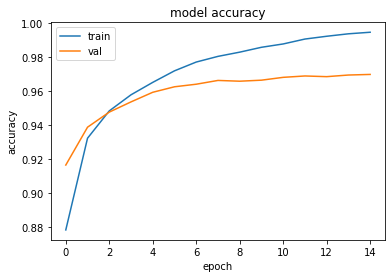

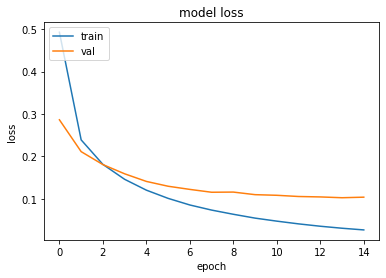

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# print(fitted_model.history)


## Testing, Prediction, Evaluation:

In [21]:
# Prediction:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)

313/313 [==============================] - 0s 422us/step
(10000, 10)


In [22]:
# Evaluation:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 0s 516us/step - loss: 0.0868 - accuracy: 0.9743
The accuracy is:  0.9743000268936157
